In [2]:
import pandas as pd
import numpy as np
import random

# --- Step 1: Create a more unique synthetic dataset for demonstration ---
def create_unique_synthetic_data(num_samples=100000):
    np.random.seed(42)

    # Generate a unique patient ID for each record
    patient_ids = range(1, num_samples + 1)

    # Generate more varied and unique data for each column
    genders = ['Male', 'Female', 'Other']
    diagnoses = ['Hypertension', 'Diabetes', 'Asthma', 'Arthritis', 'Migraine', 'Cold', 'Pneumonia', 'None']
    medications = ['Statins', 'Insulin', 'Antibiotics', 'Beta-blockers', 'Painkillers', 'Antihistamines', 'None']
    procedures = ['ECG', 'Blood Test', 'X-Ray', 'Physical Exam', 'Biopsy', 'MRI Scan', 'None']

    # Create more varied clinical notes
    def generate_note():
        templates = [
            'Patient presents with symptoms of {symptom}. No serious concerns noted.',
            'History of {condition}. Patient is stable.',
            'Admission for a procedure due to elevated {metric} levels.',
            'Routine checkup. Patient shows signs of improvement.',
            'Patient complains of {complaint}. Being monitored closely.'
        ]
        symptoms = ['fatigue', 'headache', 'fever', 'cough']
        conditions = ['heart disease', 'diabetes', 'hypertension']
        metrics = ['blood pressure', 'blood sugar', 'cholesterol']
        complaints = ['nausea', 'dizziness', 'shortness of breath']

        template = random.choice(templates)
        # Use a dictionary to format the template based on the chosen keys
        return template.format(
            symptom=random.choice(symptoms) if '{symptom}' in template else '',
            condition=random.choice(conditions) if '{condition}' in template else '',
            metric=random.choice(metrics) if '{metric}' in template else '',
            complaint=random.choice(complaints) if '{complaint}' in template else ''
        ).strip()

    data = {
        'patient_id': patient_ids,
        'age': np.random.randint(20, 90, num_samples),
        'gender': np.random.choice(genders, num_samples, p=[0.49, 0.49, 0.02]),
        'systolic_bp': np.random.normal(125, 15, num_samples).astype(int),
        'diastolic_bp': np.random.normal(80, 10, num_samples).astype(int),
        'heart_rate': np.random.normal(75, 10, num_samples).astype(int),
        'cholesterol': np.random.normal(200, 40, num_samples).astype(int),
        'blood_sugar': np.random.normal(110, 25, num_samples).astype(int),
        'bmi': np.random.normal(27, 5, num_samples),
        'diagnosis': np.random.choice(diagnoses, num_samples, p=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
        'medication': np.random.choice(medications, num_samples, p=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2]),
        'procedure': np.random.choice(procedures, num_samples, p=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2]),
        'length_of_stay_days': np.random.uniform(2, 15, num_samples).round(0).astype(int),
        'disease_risk': np.random.choice(['Low', 'Moderate', 'High'], num_samples, p=[0.6, 0.3, 0.1]),
        'clinical_notes': [generate_note() for _ in range(num_samples)]
    }
    df = pd.DataFrame(data)
    df.to_csv('synthetic_health_data.csv', index=False)
    print("Synthetic dataset created with more unique data: synthetic_health_data.csv")
    return df

# Run the function to create the new dummy data
try:
    df = pd.read_csv('synthetic_health_data.csv')
    print("Dataset loaded from file.")
except FileNotFoundError:
    print("File not found. Creating a new synthetic dataset.")
    df = create_unique_synthetic_data()


# --- Step 2: Handle Missing Values ---
# Impute missing values in categorical columns with a placeholder
df[['diagnosis', 'medication', 'procedure']] = df[['diagnosis', 'medication', 'procedure']].replace('None', np.nan)
df[['diagnosis', 'medication', 'procedure']] = df[['diagnosis', 'medication', 'procedure']].fillna('None')

# Drop the patient_id as it's an identifier, not a feature
df = df.drop(columns=['patient_id'])

# Check the cleaned data info
print("\nCleaned Data Info:")
df.info()

df.head()

Dataset loaded from file.

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   systolic_bp          100000 non-null  int64  
 3   diastolic_bp         100000 non-null  int64  
 4   heart_rate           100000 non-null  int64  
 5   cholesterol          100000 non-null  int64  
 6   blood_sugar          100000 non-null  int64  
 7   bmi                  100000 non-null  float64
 8   diagnosis            100000 non-null  object 
 9   medication           100000 non-null  object 
 10  procedure            100000 non-null  object 
 11  length_of_stay_days  100000 non-null  int64  
 12  disease_risk         100000 non-null  object 
 13  clinical_notes       100000 non-null  object 
dtypes: float64(1), int64(7)

,age,gender,systolic_bp,diastolic_bp,heart_rate,cholesterol,blood_sugar,bmi,diagnosis,medication,procedure,length_of_stay_days,disease_risk,clinical_notes
0,71,Male,147,79,84,187,171,31.574934,Pneumonia,Painkillers,Blood Test,4,Moderate,Admission for a procedure due to elevated chol...
1,34,Female,111,80,69,216,97,24.237218,Migraine,None,Physical Exam,2,Moderate,Patient complains of dizziness. Being monitore...
2,80,Male,142,78,68,201,92,17.797760,Pneumonia,Painkillers,ECG,15,Moderate,Admission for a procedure due to elevated bloo...
3,40,Female,130,92,67,162,89,22.987696,None,Statins,Blood Test,3,Moderate,Patient complains of shortness of breath. Bein...
4,43,Female,155,72,80,216,111,26.031635,Asthma,Beta-blockers,ECG,5,Moderate,Patient presents with symptoms of fatigue. No ...


In [4]:
df.describe()

,age,systolic_bp,diastolic_bp,heart_rate,cholesterol,blood_sugar,bmi,length_of_stay_days
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,54.353390,124.521730,79.488230,74.462830,199.47361,109.517760,27.004990,8.512000
std,20.187606,14.992781,10.005697,10.043637,40.08555,25.022707,5.022672,3.776488
min,20.000000,58.000000,38.000000,33.000000,38.00000,6.000000,4.366959,2.000000
25%,37.000000,114.000000,73.000000,68.000000,172.00000,93.000000,23.615665,5.000000
50%,54.000000,125.000000,80.000000,74.000000,200.00000,109.000000,26.997421,9.000000
75%,72.000000,135.000000,86.000000,81.000000,227.00000,126.000000,30.393816,12.000000
max,89.000000,197.000000,128.000000,116.000000,386.00000,226.000000,50.175519,15.000000


In [5]:
df.head()

,age,gender,systolic_bp,diastolic_bp,heart_rate,cholesterol,blood_sugar,bmi,diagnosis,medication,procedure,length_of_stay_days,disease_risk,clinical_notes
0,71,Male,147,79,84,187,171,31.574934,Pneumonia,Painkillers,Blood Test,4,Moderate,Admission for a procedure due to elevated chol...
1,34,Female,111,80,69,216,97,24.237218,Migraine,None,Physical Exam,2,Moderate,Patient complains of dizziness. Being monitore...
2,80,Male,142,78,68,201,92,17.797760,Pneumonia,Painkillers,ECG,15,Moderate,Admission for a procedure due to elevated bloo...
3,40,Female,130,92,67,162,89,22.987696,None,Statins,Blood Test,3,Moderate,Patient complains of shortness of breath. Bein...
4,43,Female,155,72,80,216,111,26.031635,Asthma,Beta-blockers,ECG,5,Moderate,Patient presents with symptoms of fatigue. No ...


In [6]:
df.tail()

,age,gender,systolic_bp,diastolic_bp,heart_rate,cholesterol,blood_sugar,bmi,diagnosis,medication,procedure,length_of_stay_days,disease_risk,clinical_notes
99995,50,Male,128,84,73,154,98,29.720941,Hypertension,None,Physical Exam,8,Low,History of hypertension. Patient is stable.
99996,69,Male,126,97,83,160,115,33.970976,Cold,Insulin,None,7,Moderate,History of heart disease. Patient is stable.
99997,80,Male,123,94,63,246,77,25.572374,Arthritis,Antibiotics,MRI Scan,9,Low,History of hypertension. Patient is stable.
99998,36,Male,118,75,73,205,116,20.624266,Diabetes,None,Blood Test,11,Low,Patient presents with symptoms of fatigue. No ...
99999,70,Female,117,85,68,260,144,21.835479,Hypertension,Statins,Blood Test,6,High,Patient complains of dizziness. Being monitore...


## 2. Exploratory Data Analysis (EDA)

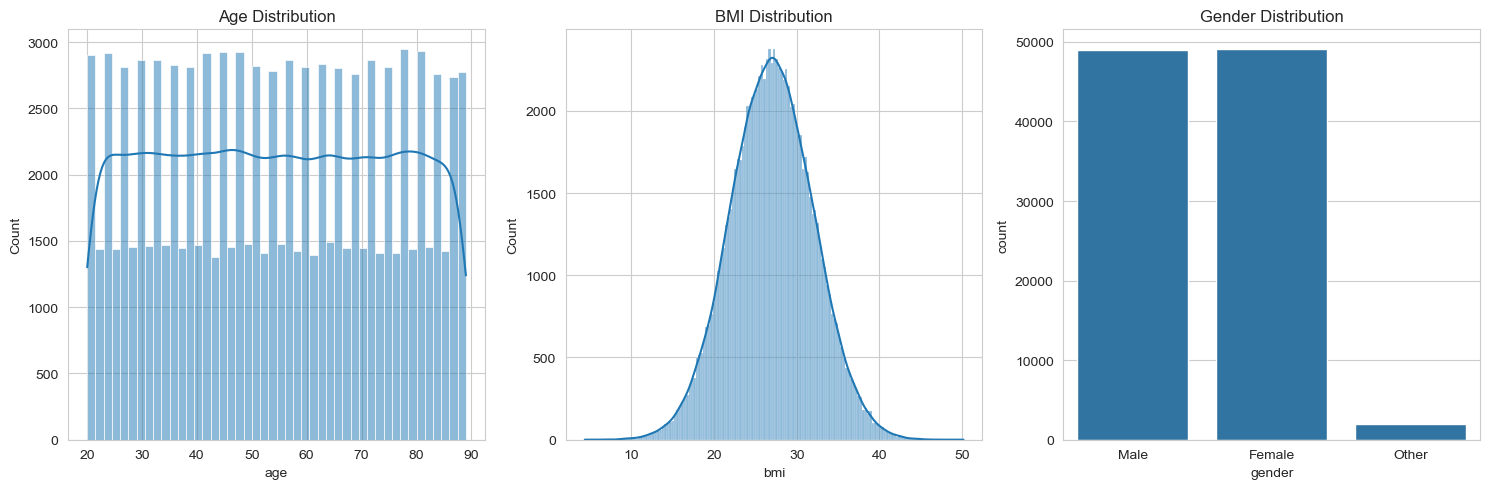

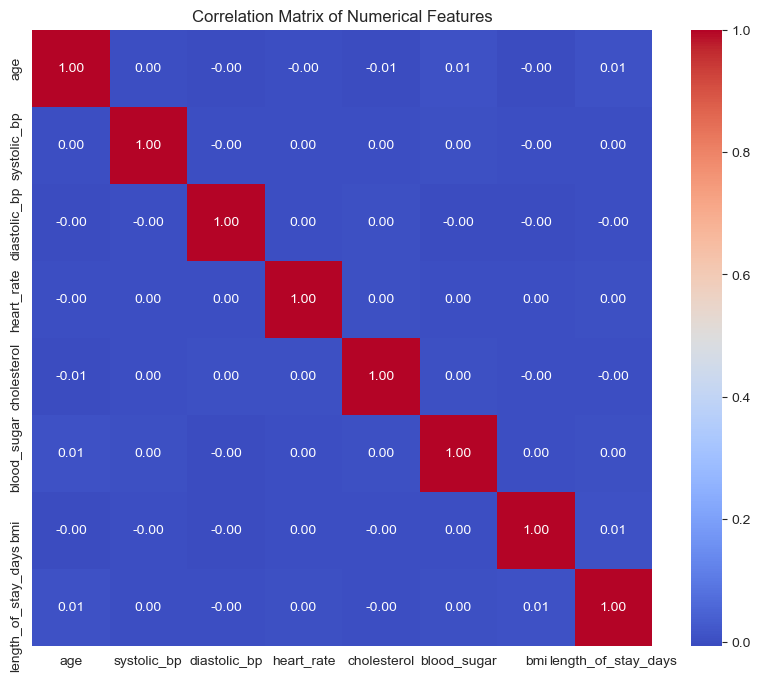

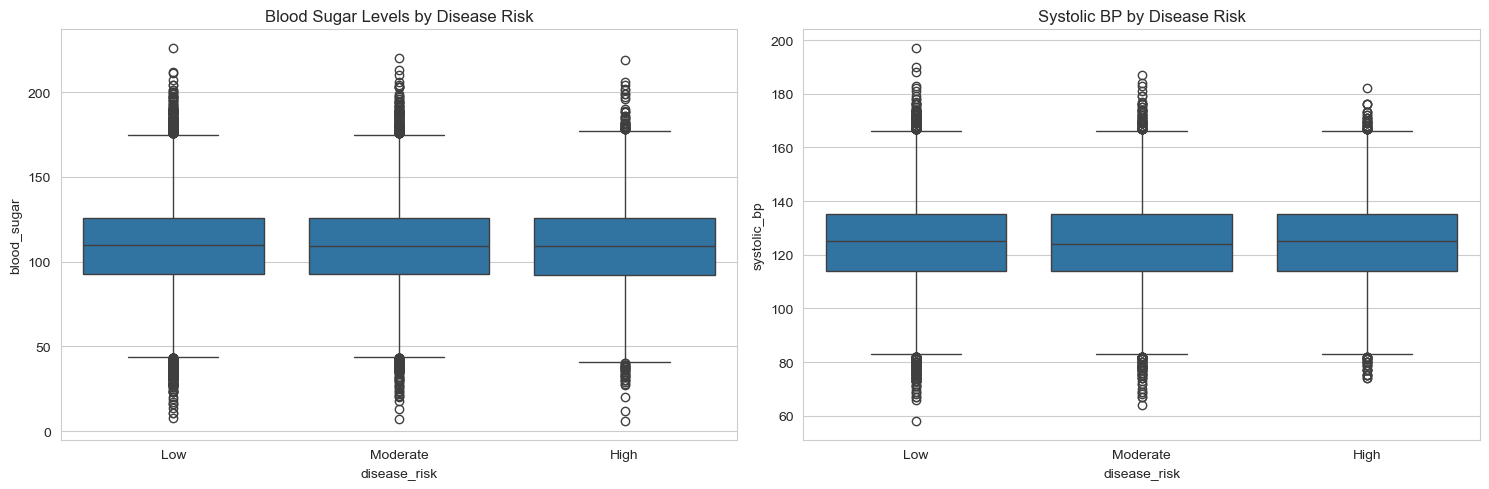

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# --- Distribution of key features ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

# --- Correlation Heatmap for numerical features ---
numerical_cols = ['age', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol', 'blood_sugar', 'bmi', 'length_of_stay_days']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- Box plots to see feature distribution by disease risk ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='disease_risk', y='blood_sugar', data=df, order=['Low', 'Moderate', 'High'])
plt.title('Blood Sugar Levels by Disease Risk')

plt.subplot(1, 2, 2)
sns.boxplot(x='disease_risk', y='systolic_bp', data=df, order=['Low', 'Moderate', 'High'])
plt.title('Systolic BP by Disease Risk')

plt.tight_layout()
plt.show()

 ## 3. Feature Engineering


In [8]:
# --- Create categorical features from numerical data ---
# BMI Category
def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    if bmi < 24.9: return 'Normal'
    if bmi < 29.9: return 'Overweight'
    return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# Hypertension Status
df['hypertension'] = ((df['systolic_bp'] > 130) | (df['diastolic_bp'] > 80)).astype(int)

# One-hot encode new categorical variables for modeling
categorical_cols = ['gender', 'diagnosis', 'medication', 'procedure', 'bmi_category']
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_processed.head()

,age,systolic_bp,diastolic_bp,heart_rate,cholesterol,blood_sugar,bmi,length_of_stay_days,disease_risk,clinical_notes,...,medication_Statins,procedure_Blood Test,procedure_ECG,procedure_MRI Scan,procedure_None,procedure_Physical Exam,procedure_X-Ray,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,71,147,79,84,187,171,31.574934,4,Moderate,Admission for a procedure due to elevated chol...,...,False,True,False,False,False,False,False,True,False,False
1,34,111,80,69,216,97,24.237218,2,Moderate,Patient complains of dizziness. Being monitore...,...,False,False,False,False,False,True,False,False,False,False
2,80,142,78,68,201,92,17.797760,15,Moderate,Admission for a procedure due to elevated bloo...,...,False,False,True,False,False,False,False,False,False,True
3,40,130,92,67,162,89,22.987696,3,Moderate,Patient complains of shortness of breath. Bein...,...,True,True,False,False,False,False,False,False,False,False
4,43,155,72,80,216,111,26.031635,5,Moderate,Patient presents with symptoms of fatigue. No ...,...,False,False,True,False,False,False,False,False,True,False


## 4. Classification Modeling (Risk Stratification)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import joblib

# Prepare data for classification
# First, map the string labels to numerical values. This might create NaNs.
y_cls = df_processed['disease_risk'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Now, filter both features (X) and target (y) to remove rows where the mapping failed.
valid_indices = y_cls.dropna().index
df_filtered_cls = df_processed.loc[valid_indices]
y_cls_clean = y_cls.loc[valid_indices]

# Now, define the features based on the filtered DataFrame.
feature_cols_cls = [col for col in df_filtered_cls.columns if col not in ['length_of_stay_days', 'disease_risk', 'clinical_notes']]
X_cls = df_filtered_cls[feature_cols_cls]

# Split the data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls_clean, test_size=0.2, random_state=42)

# Create a pipeline for scaling and modeling
pipeline_cls = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20]
}
grid_search_cls = GridSearchCV(pipeline_cls, param_grid, cv=3, scoring='f1_weighted', verbose=1)

# Fit the model on the cleaned training data
grid_search_cls.fit(X_train_cls, y_train_cls)
best_pipeline_cls = grid_search_cls.best_estimator_

print("Best Classification Model Parameters:", grid_search_cls.best_params_)

# Make predictions and evaluate
y_pred_cls = best_pipeline_cls.predict(X_test_cls)

# Define all possible target names
target_names_all = ['Low', 'Moderate', 'High']

# Filter the target names to include only the ones present in the test set
# The fix: convert the numpy float values to integers before using them as indices
unique_labels_in_test = sorted(y_test_cls.unique())
filtered_target_names = [target_names_all[int(i)] for i in unique_labels_in_test]

print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_cls, target_names=filtered_target_names))

# Save the trained model
joblib.dump(best_pipeline_cls, 'risk_strat_classifier.joblib')
print("\nClassification model saved as risk_strat_classifier.joblib")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Classification Model Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

         Low       0.60      1.00      0.75     11914
    Moderate       0.36      0.00      0.01      6018
        High       0.00      0.00      0.00      2068

    accuracy                           0.60     20000
   macro avg       0.32      0.33      0.25     20000
weighted avg       0.46      0.60      0.45     20000


Classification model saved as risk_strat_classifier.joblib


C:\Users\Hp\.anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\.anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\.anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 5. Regression Modeling (Length of Stay)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Prepare data for regression
feature_cols_reg = [col for col in df_processed.columns if col not in ['length_of_stay_days', 'disease_risk', 'clinical_notes']]
X_reg = df_processed[feature_cols_reg]
y_reg = df_processed['length_of_stay_days']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create a regression pipeline with a Gradient Boosting model
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the hyperparameters to search
param_grid_reg = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.05, 0.1]
}

# Perform GridSearchCV to find the best parameters
print("Starting regression model hyperparameter tuning...")
grid_search_reg = GridSearchCV(pipeline_reg, param_grid_reg, cv=3, scoring='r2', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
best_pipeline_reg = grid_search_reg.best_estimator_

print("\nBest Regression Model Parameters:", grid_search_reg.best_params_)

# Make predictions and evaluate with the best model
y_pred_reg = best_pipeline_reg.predict(X_test_reg)

print("\nImproved Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"R-squared (R²): {r2_score(y_test_reg, y_pred_reg):.2f}")

# Save the best trained model
joblib.dump(best_pipeline_reg, 'los_regressor.joblib')
print("\nImproved regression model saved as los_regressor.joblib")

Starting regression model hyperparameter tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Regression Model Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}

Improved Regression Evaluation:
Mean Absolute Error (MAE): 3.25
R-squared (R²): -0.00

Improved regression model saved as los_regressor.joblib


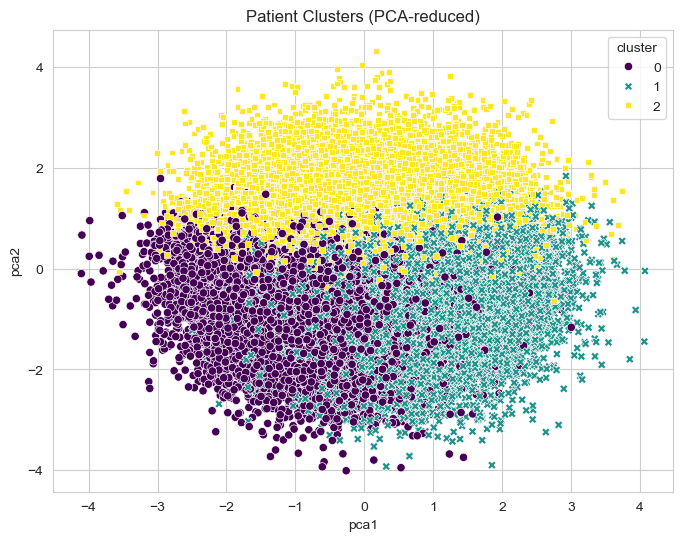

Clustering models saved.

Cluster Analysis (Mean Feature Values):
               age  systolic_bp  diastolic_bp  heart_rate  cholesterol  \
cluster                                                                  
0        35.705624   122.275783     80.122775   72.078832   188.590201   
1        73.476000   122.855773     79.791745   72.136255   187.311745   
2        53.771907   129.190733     78.368696   80.085323   226.980829   

         blood_sugar        bmi  
cluster                          
0         102.165782  27.228014  
1         104.150014  27.135817  
2         124.699184  26.582670  


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Use key numerical features for clustering
X_clust = df_processed[['age', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol', 'blood_sugar', 'bmi']]

# Scale the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_processed['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_processed['pca1'] = principal_components[:, 0]
df_processed['pca2'] = principal_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_processed, palette='viridis', style='cluster')
plt.title('Patient Clusters (PCA-reduced)')
plt.show()

# Save the scaler and kmeans model
joblib.dump(scaler, 'cluster_scaler.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')
print("Clustering models saved.")

# Analyze the clusters
print("\nCluster Analysis (Mean Feature Values):")
print(df_processed.groupby('cluster')[X_clust.columns].mean())

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming df_processed is already loaded from previous steps
# If not, ensure it's loaded and preprocessed correctly.
# df_processed = ... # Load and preprocess your data here

# Prepare data for the neural network
feature_cols_ann = [col for col in df_processed.columns if col not in ['length_of_stay_days', 'disease_risk', 'clinical_notes', 'cluster', 'pca1', 'pca2']]
X_ann = df_processed[feature_cols_ann]
y_ann = df_processed['length_of_stay_days']

# Split the data
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ann)
X_test_scaled = scaler.transform(X_test_ann)

# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2)) # Prevents overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) # Output layer for regression

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
print("Training the ANN model...")
history = model.fit(X_train_scaled, y_train_ann,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model on the test data
y_pred_ann = model.predict(X_test_scaled).flatten()
mae_ann = mean_absolute_error(y_test_ann, y_pred_ann)
r2_ann = r2_score(y_test_ann, y_pred_ann)

print("\nANN Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ann:.2f}")
print(f"R-squared (R²): {r2_ann:.2f}")

# You can save the model weights and the scaler for future use
model.save('los_ann_model.h5')
joblib.dump(scaler, 'los_ann_scaler.joblib')
print("\nANN model and scaler saved.")

C:\Users\Hp\.anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the ANN model...
Epoch 1/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 15.5472 - mae: 3.3642 - val_loss: 14.5949 - val_mae: 3.2968
Epoch 2/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 14.6939 - mae: 3.2985 - val_loss: 14.5233 - val_mae: 3.2908
Epoch 3/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 14.6029 - mae: 3.2894 - val_loss: 14.5517 - val_mae: 3.2974
Epoch 4/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 14.4907 - mae: 3.2822 - val_loss: 14.4685 - val_mae: 3.2873
Epoch 5/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 14.4269 - mae: 3.2760 - val_loss: 14.4509 - val_mae: 3.2893
Epoch 6/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 14.3951 - mae: 3.2749 - val_loss: 14.4729 - val_mae: 3.2915
Epoch 7/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 14.3508 - mae: 3.2728 - val_loss: 14.4133 - val_mae: 3.2890
Epoch 8/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 14.3218 - mae: 3.2693 - val_loss: 14.3859 - val_ma


ANN Model Evaluation:
Mean Absolute Error (MAE): 3.27
R-squared (R²): -0.02

ANN model and scaler saved.
